In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [206]:
df=pd.read_excel("Bankruptcy.xlsx")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [207]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [209]:
df.shape

(250, 7)

In [210]:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

In [211]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [212]:
duplicaterows= df.duplicated().sum()
duplicaterows

np.int64(147)

In [213]:
df = df.drop_duplicates()
duplicaterows= df.duplicated().sum()
duplicaterows

np.int64(0)

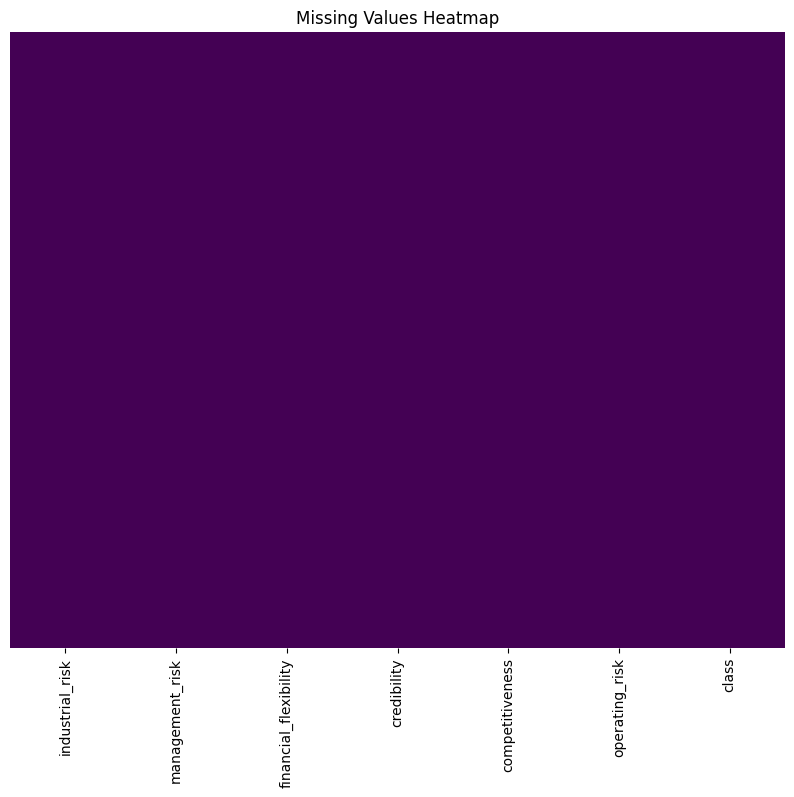

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)
plt.title('Missing Values Heatmap')
plt.show()


industrial_risk             Axes(0.125,0.653529;0.227941x0.226471)
management_risk          Axes(0.398529,0.653529;0.227941x0.226471)
financial_flexibility    Axes(0.672059,0.653529;0.227941x0.226471)
credibility                 Axes(0.125,0.381765;0.227941x0.226471)
competitiveness          Axes(0.398529,0.381765;0.227941x0.226471)
operating_risk           Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

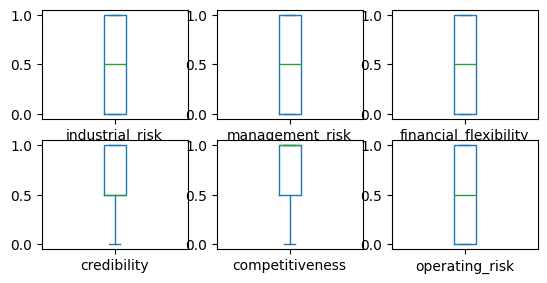

In [215]:
df.plot(kind='box',subplots=True,layout=(3,3))

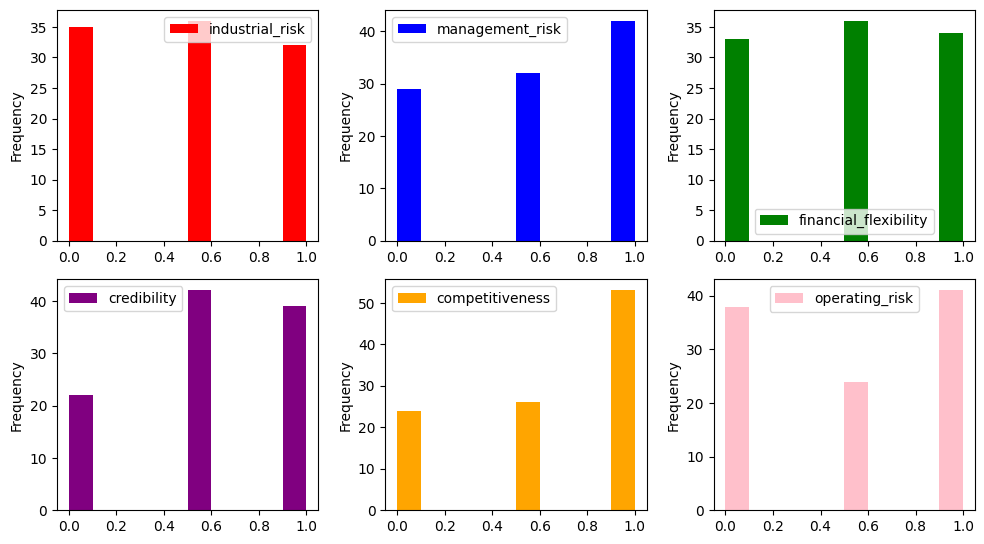

In [216]:

# Define custom colors for the 7 columns
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan']

# Plot histograms with custom colors
df.plot(kind='hist', subplots=True, layout=(3, 3), color=colors, figsize=(10, 8), sharex=False, sharey=False)

plt.tight_layout()
plt.show()

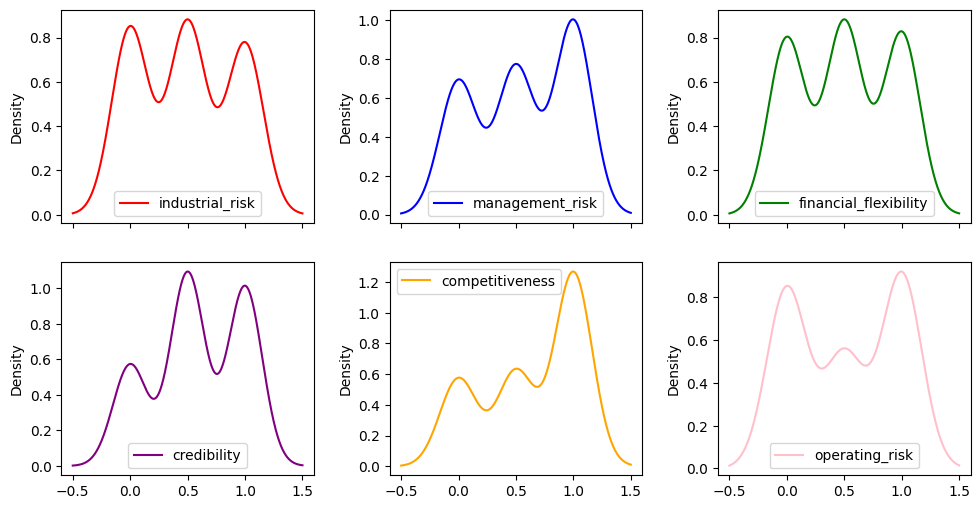

In [217]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan']

# Plot KDE with custom colors
df.plot(kind='kde', subplots=True, layout=(4, 3), color=colors, figsize=(10, 10))

plt.tight_layout()
plt.show()

<Axes: xlabel='industrial_risk', ylabel='count'>

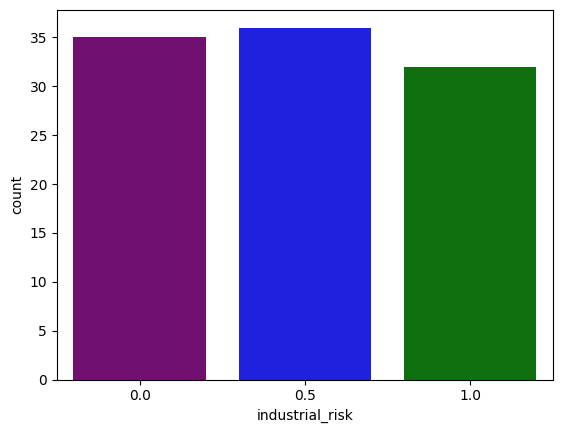

In [218]:
sns.countplot(x='industrial_risk',data=df,palette=['purple','blue','green'])

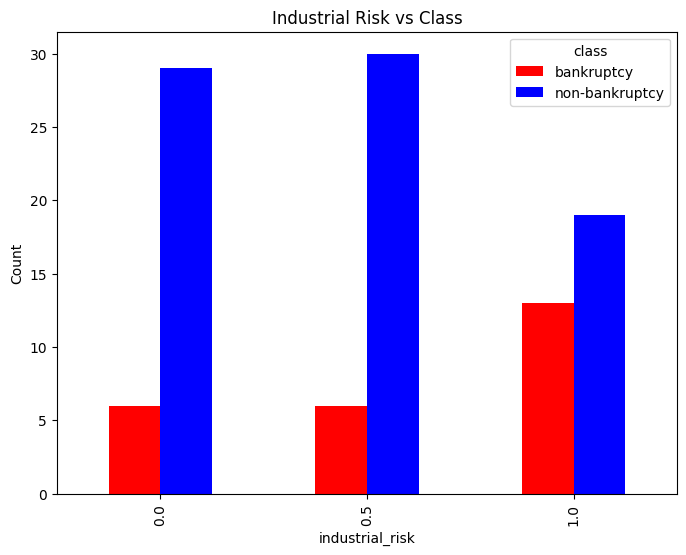

In [219]:
crosstab = pd.crosstab(df['industrial_risk'], df['class'])

# Custom colors for the bar plot
colors = ['red', 'blue', 'green']

# Plot the crosstab with custom colors
crosstab.plot(kind='bar', color=colors, figsize=(8, 6))

plt.ylabel('Count')
plt.title('Industrial Risk vs Class')
plt.show()

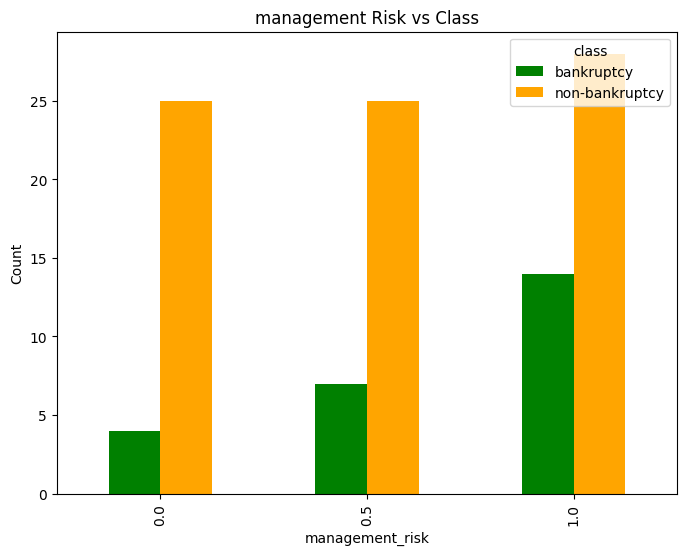

In [220]:
crosstab = pd.crosstab(df['management_risk'], df['class'])

# Custom colors for the bar plot
colors = ['green', 'orange']

# Plot the crosstab with custom colors
crosstab.plot(kind='bar', color=colors, figsize=(8, 6))

plt.ylabel('Count')
plt.title('management Risk vs Class')
plt.show()

In [221]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [222]:
corr=df.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


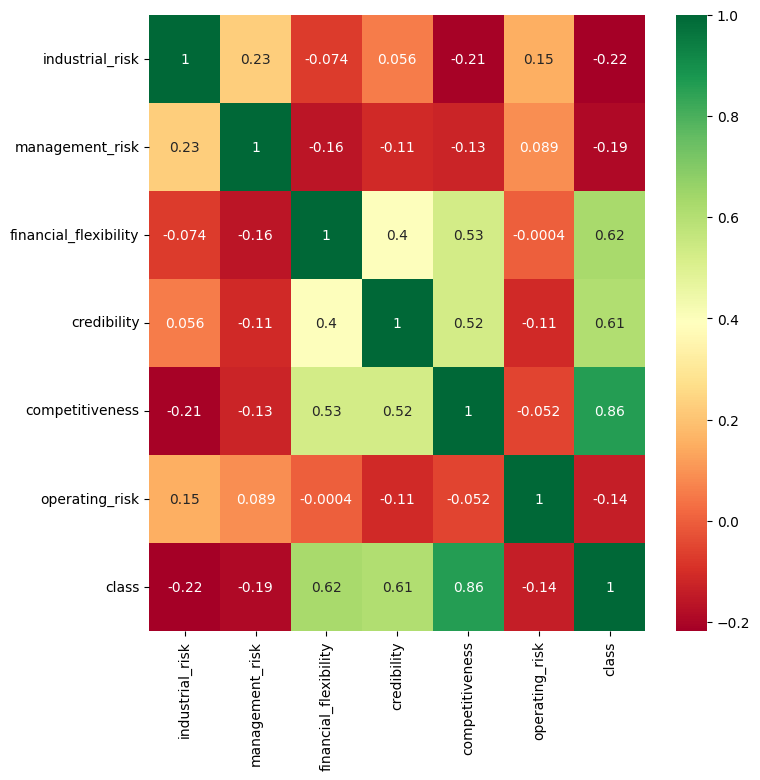

In [223]:

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap=sns.color_palette("RdYlGn", as_cmap=True))
plt.show()


In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [225]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataframe and 'class' is the target column
x = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets with a fixed train size (e.g., 0.7 for 70% training data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=42)

# Now, x_train, x_test, y_train, y_test are available for model training and evaluation


In [226]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 6)
(31, 6)
(72,)
(31,)


In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
model_lr = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['liblinear', 'saga'],    # Solvers (depends on penalty)
    'max_iter': [100, 200, 500]         # Number of iterations
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Best model with optimized hyperparameters
best_model_lr = grid_search.best_estimator_


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/vadithyapavankumarnaik/Documents/my project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vadithyapavankumarnaik/Documents/my project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vadithyapavankumarnaik/Documents/my project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vadithyapavankumarnaik/Documents/my project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vadithyapavankumarnaik/Documents/my project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: C

Accuracy on Test Set: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31

ROC-AUC Score: 0.9782608695652174
Log Loss: 0.39664986045589634


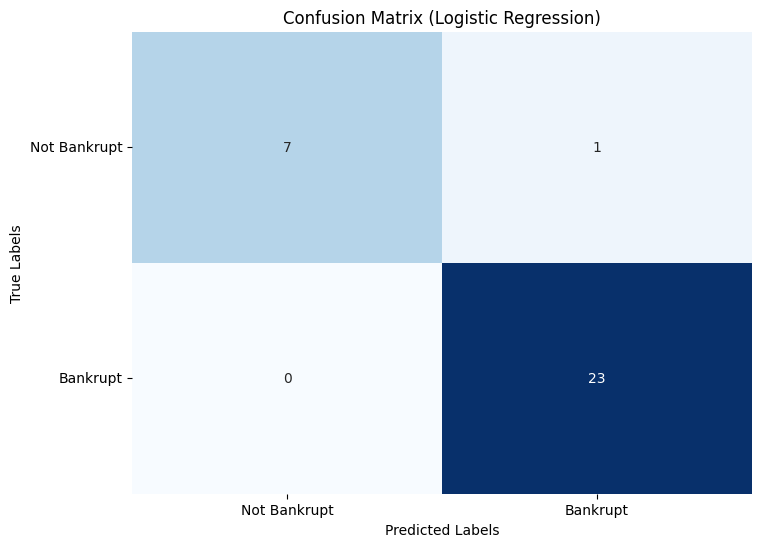

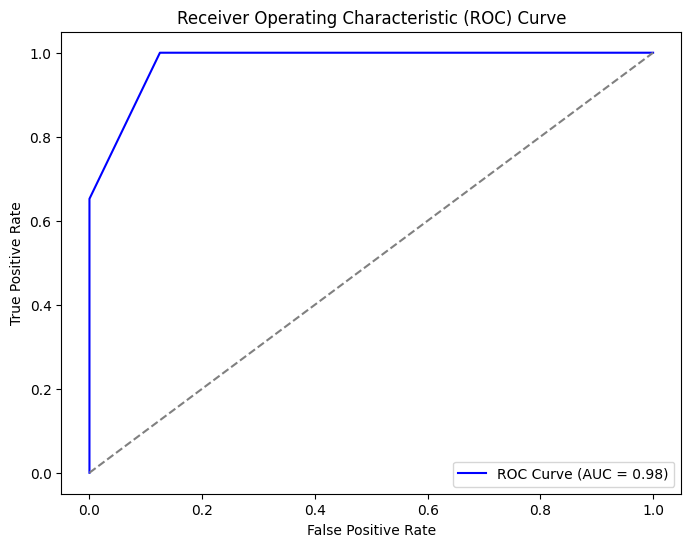

In [228]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_lr = best_model_lr.predict(x_test)
y_prob_lr = best_model_lr.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate accuracy and store it in acc_lr
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy on Test Set:", acc_lr)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print("ROC-AUC Score:", roc_auc_lr)

# Log Loss
logloss_lr = log_loss(y_test, y_prob_lr)
print("Log Loss:", logloss_lr)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'])  # Customize as per your classes
plt.yticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'], rotation=0)  # Customize as per your classes
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')  # Use roc_auc_lr here
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [229]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Retrieve the best model after tuning
best_gnb = grid_search.best_estimator_

# Train the best Gaussian Naive Bayes mode

Accuracy on Test Set: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31

ROC-AUC Score: 0.9375
Log Loss: 1.1626985186579493


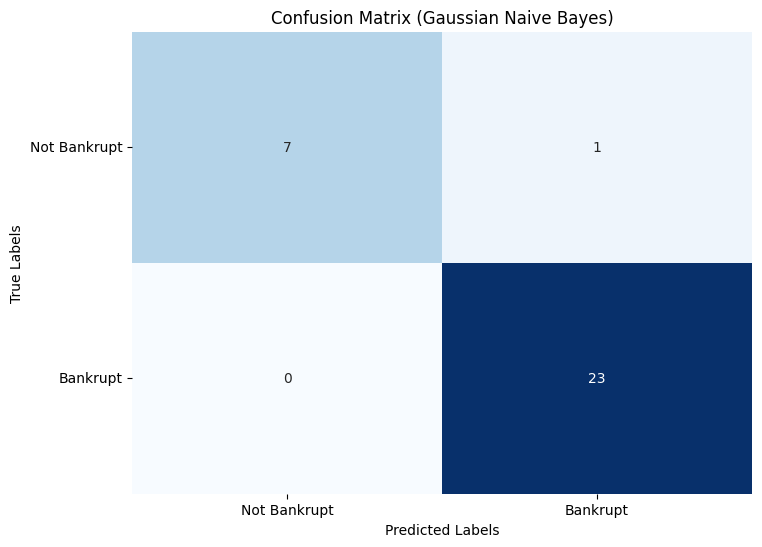

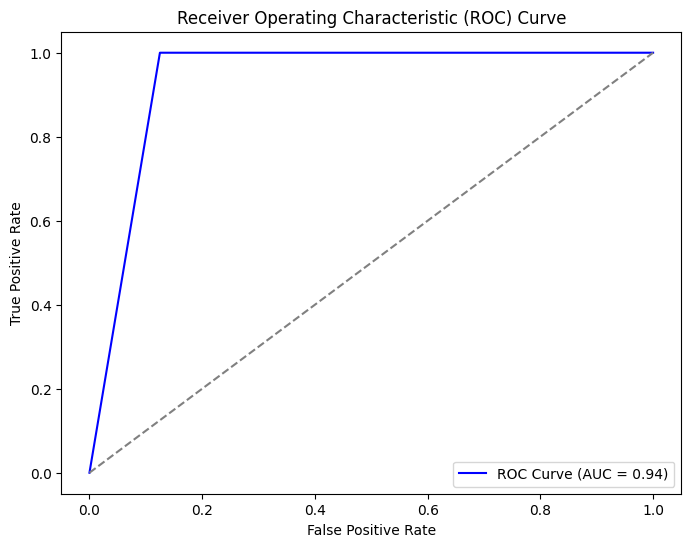

In [230]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_nb = best_model_nb.predict(x_test)
y_prob_nb = best_model_nb.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate accuracy and store it in acc_lr
acc_gb = accuracy_score(y_test, y_pred_nb)
print("Accuracy on Test Set:", acc_gb)


# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, y_prob_nb)
print("ROC-AUC Score:", roc_auc_gb)

# Log Loss
logloss_gb = log_loss(y_test, y_prob_nb)
print("Log Loss:", logloss_gb)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Gaussian Naive Bayes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'])  # Customize as per your classes
plt.yticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'], rotation=0)  # Customize as per your classes
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether to use bootstrap samples or not
}

# Perform Grid Search for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search_rf.fit(x_train, y_train)

# Retrieve the best model after tuning
best_rf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Accuracy on Test Set: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31

ROC-AUC Score: 1.0
Log Loss: 0.0682232844426404


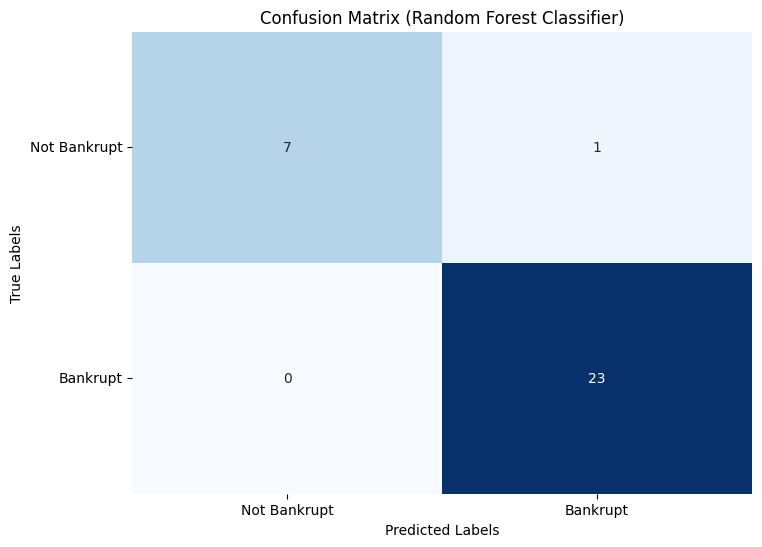

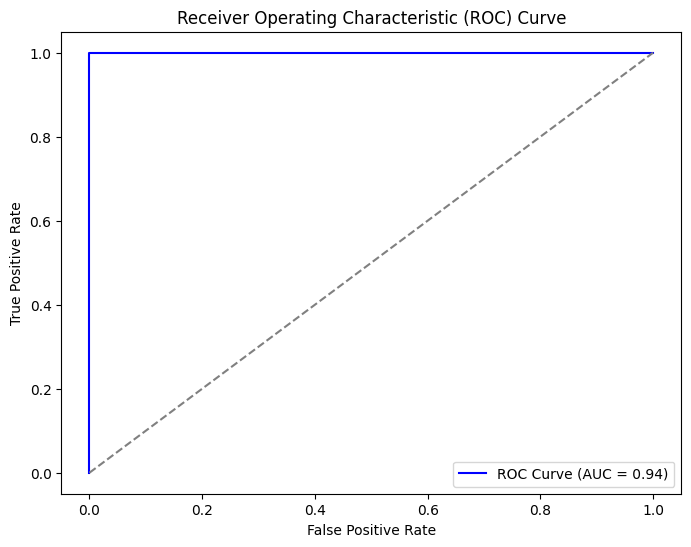

In [232]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_rf = best_rf.predict(x_test)
y_prob_rf = best_rf.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate accuracy and store it in acc_lr
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on Test Set:", acc_rf)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", roc_auc_rf)

# Log Loss
logloss_rf = log_loss(y_test, y_prob_rf)
print("Log Loss:", logloss_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'])  # Customize as per your classes
plt.yticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'], rotation=0)  # Customize as per your classes
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [233]:
#DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_dt = {
    'criterion': ['gini', 'entropy'],           # Criterion for splitting nodes
    'max_depth': [None, 10, 20, 30, 40],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],     # Number of features to consider at each split
    'splitter': ['best', 'random']              # Strategy for splitting nodes
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search_dt.fit(x_train, y_train)

# Best model with optimized hyperparameters
best_model_dt = grid_search_dt.best_estimator_


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


Accuracy on Test Set: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31

ROC-AUC Score: 0.9375
Log Loss: 1.162698496423134


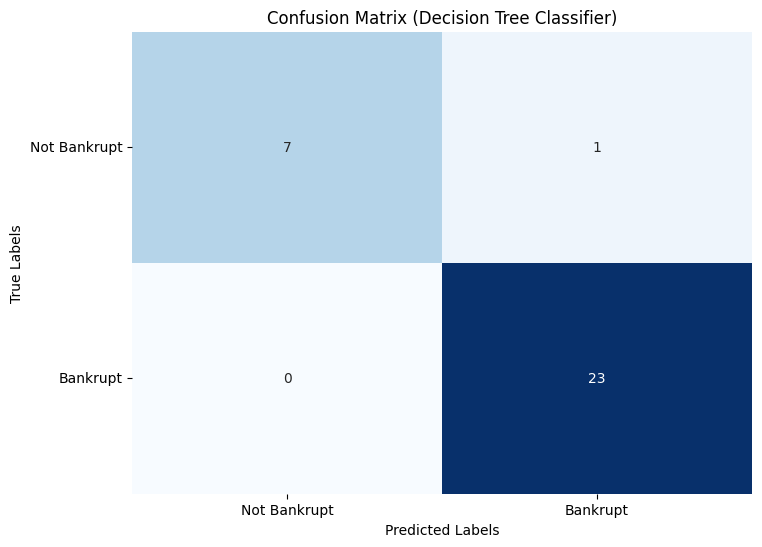

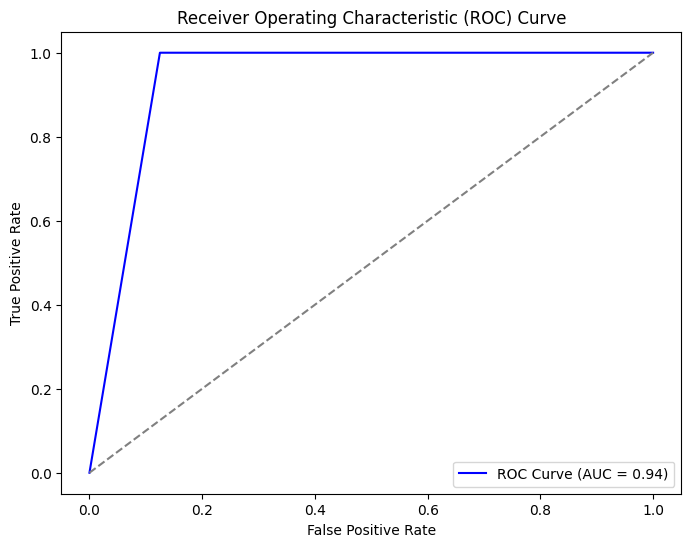

In [234]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_dt = best_model_dt.predict(x_test)
y_prob_dt = best_model_dt.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate accuracy and store it in acc_lr
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy on Test Set:", acc_dt)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC Score:", roc_auc_dt)

# Log Loss
logloss_dt = log_loss(y_test, y_prob_dt)
print("Log Loss:", logloss_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Decision Tree Classifier)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'])  # Customize as per your classes
plt.yticks([0.5, 1.5], ['Not Bankrupt', 'Bankrupt'], rotation=0)  # Customize as per your classes
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [235]:
kernel=['linear','rbf','polynomial']
C=[5,10,12,15,16]
gamma=[50,5,10,6]
param_grid=dict(kernel=kernel,C=C,gamma=gamma)
grid=GridSearchCV(estimator=SVC(),param_grid=param_grid)
grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
acc_svm=grid.best_score_

0.9866666666666667
{'C': 5, 'gamma': 50, 'kernel': 'linear'}


In [236]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))

1.0


In [237]:
n_neigh=np.arange(1,30)
param_grid=dict(n_neighbors=n_neigh)
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid)
grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
acc_knn=grid.best_score_

1.0
{'n_neighbors': np.int64(8)}


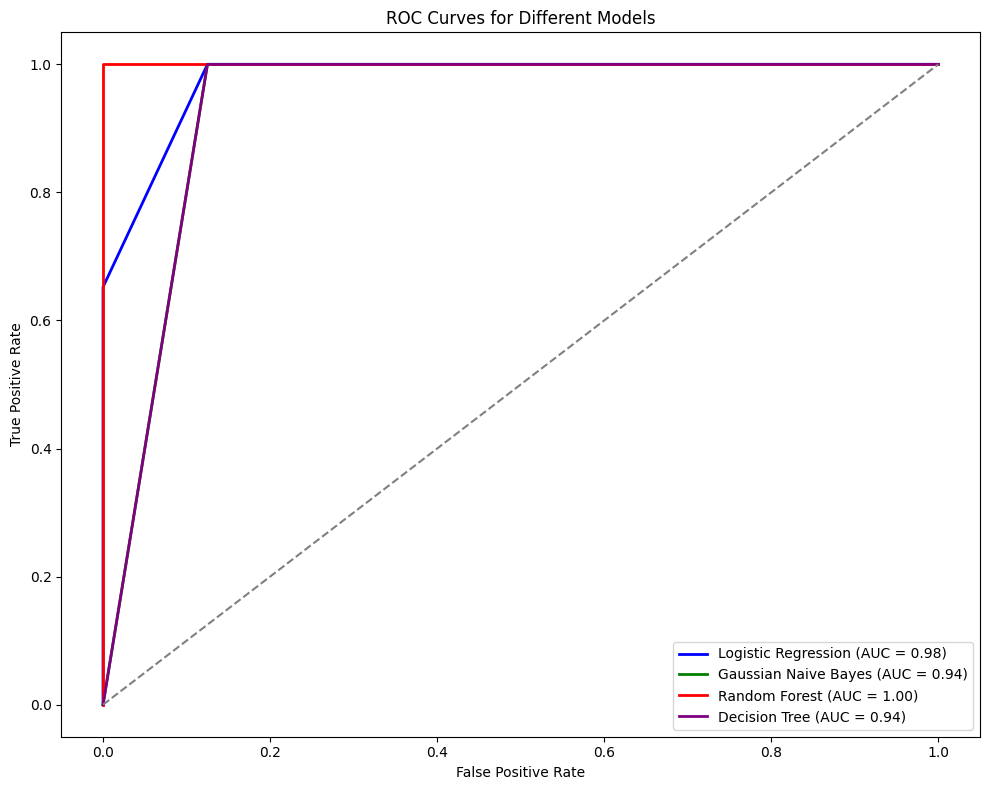

In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# List of models and their predicted probabilities
models = [best_model_lr, best_model_nb, best_rf, best_model_dt]
model_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree']
colors = ['blue', 'green', 'red', 'purple']

# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Loop through each model to plot the ROC curve
for model, name, color in zip(models, model_names, colors):
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(x_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


                  Model  Accuracy   ROC-AUC  Log Loss
0   Logistic Regression  0.967742  0.978261  0.396650
1  Gaussian Naive Bayes  0.967742  0.937500  1.162699
2         Random Forest  0.967742  1.000000  0.068223
3         Decision Tree  0.967742  0.937500  1.162698


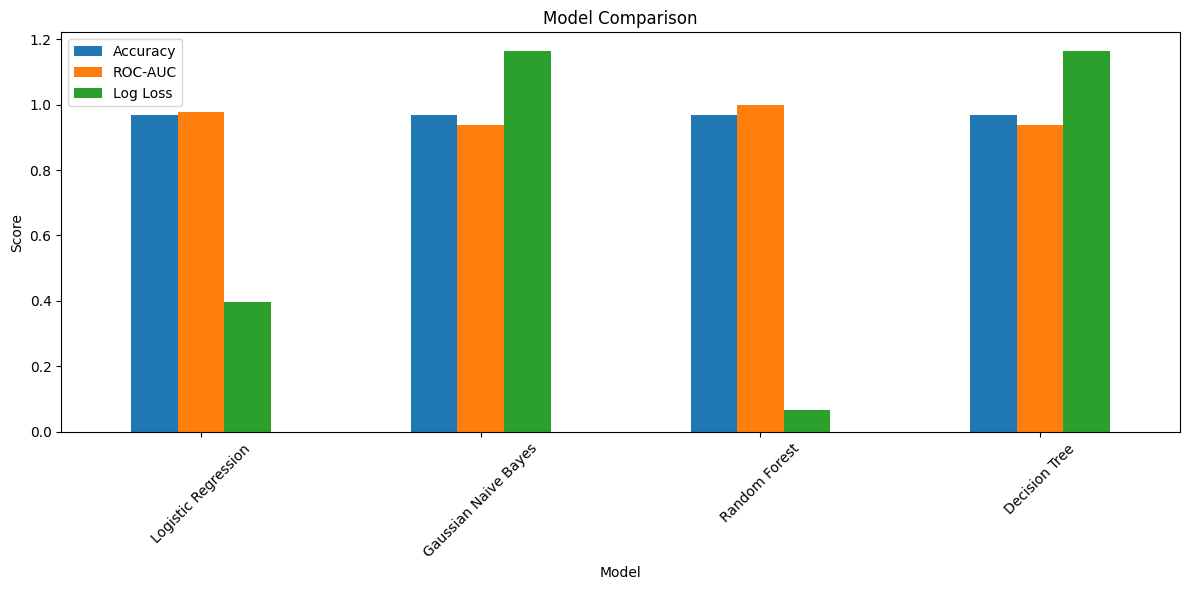

In [239]:
import pandas as pd

# Store all the values for comparison
accuracies = [acc_lr, acc_gb, acc_rf, acc_dt]  # Including Decision Tree (acc_dt)
roc_auc_scores = [roc_auc_lr, roc_auc_gb, roc_auc_rf, roc_auc_dt]  # Including Decision Tree (roc_auc_dt)
logloss_values = [logloss_lr, logloss_gb, logloss_rf, logloss_dt]  # Including Decision Tree (logloss_dt)

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'],
    'Accuracy': accuracies,
    'ROC-AUC': roc_auc_scores,
    'Log Loss': logloss_values
})

# Display the comparison table
print(comparison_df)

# Visualize the comparison using bar plots
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot accuracy, ROC-AUC, and Log Loss in a barplot
comparison_df.set_index('Model')[['Accuracy', 'ROC-AUC', 'Log Loss']].plot(kind='bar', ax=plt.gca())

# Title and labels
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [240]:
import pickle

# Save the trained Logistic Regression classifier using pickle
with open('logisticregression.pkl', 'wb') as file:
    pickle.dump(model_lr, file) # Changed 'logisticregression' to 'model_lr'